In [2]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

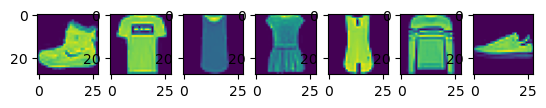

In [6]:
for i in range(7):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [7]:
input_shape = (28, 28, 1)

In [8]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      # Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      # MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [9]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [11]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4107 - accuracy: 0.8544 - val_loss: 0.3226 - val_accuracy: 0.8834
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2822 - accuracy: 0.8982 - val_loss: 0.3005 - val_accuracy: 0.8900
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2409 - accuracy: 0.9115 - val_loss: 0.3008 - val_accuracy: 0.8919
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2107 - accuracy: 0.9237 - val_loss: 0.2684 - val_accuracy: 0.9018
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1879 - accuracy: 0.9313 - val_loss: 0.2620 - val_accuracy: 0.9046
CPU times: total: 9min 1s
Wall time: 1min 52s


In [12]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [13]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5375 - accuracy: 0.8152 - val_loss: 0.4590 - val_accuracy: 0.8383
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4107 - accuracy: 0.8541 - val_loss: 0.4250 - val_accuracy: 0.8484
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3773 - accuracy: 0.8640 - val_loss: 0.4126 - val_accuracy: 0.8526
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3510 - accuracy: 0.8729 - val_loss: 0.3936 - val_accuracy: 0.8591
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3329 - accuracy: 0.8803 - val_loss: 0.3762 - val_accuracy: 0.8681
CPU times: total: 55.1 s
Wall time: 34.2 s


In [15]:
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [16]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4250 - accuracy: 0.8489 - val_loss: 0.3230 - val_accuracy: 0.8811
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2803 - accuracy: 0.8991 - val_loss: 0.2942 - val_accuracy: 0.8959
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2342 - accuracy: 0.9146 - val_loss: 0.2636 - val_accuracy: 0.9051
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2063 - accuracy: 0.9245 - val_loss: 0.2444 - val_accuracy: 0.9110
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1797 - accuracy: 0.9347 - val_loss: 0.2467 - val_accuracy: 0.9131
CPU times: total: 16min 33s
Wall time: 3min


In [18]:
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [19]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat) )


Epoch 1/10
1875/1875 [==============================] - 55s 28ms/step - loss: 0.4385 - accuracy: 0.8399 - val_loss: 0.3096 - val_accuracy: 0.8868
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2740 - accuracy: 0.8995 - val_loss: 0.2815 - val_accuracy: 0.8953
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2305 - accuracy: 0.9145 - val_loss: 0.2630 - val_accuracy: 0.9042
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1987 - accuracy: 0.9266 - val_loss: 0.2505 - val_accuracy: 0.9074
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1730 - accuracy: 0.9365 - val_loss: 0.2352 - val_accuracy: 0.9142
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1542 - accuracy: 0.9434 - val_loss: 0.2484 - val_accuracy: 0.9181
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1355 - accuracy: 0.9490 - val_loss: 0.2326 -

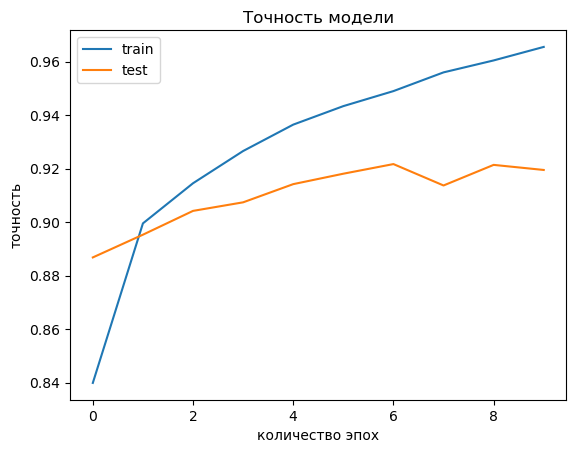

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

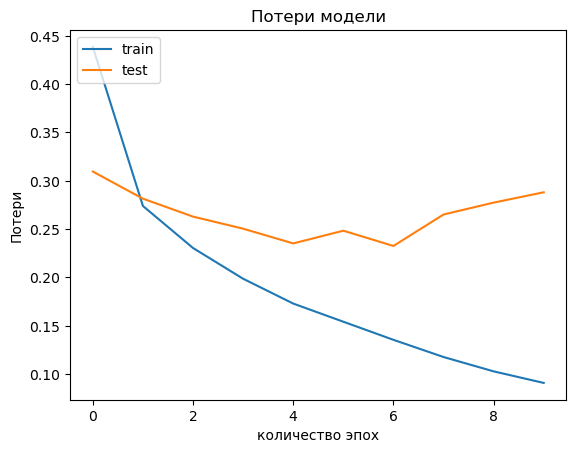

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [27]:
#keras.utils.plot_model(model_4)

In [28]:
# Оцениваем работу загруженной модели на тестовых данных
results = model_4.evaluate(x_test, y_test_cat)
print('test loss, test acc:', results)

313/313 [==============================] - 2s 6ms/step - loss: 0.2881 - accuracy: 0.9195
test loss, test acc: [0.2881374955177307, 0.9194999933242798]
